# Inspect data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_level = "normalized_feature_select"

data_path = f"output/processed/{data_level}/combined.parquet"

all_df = pd.read_parquet(data_path)

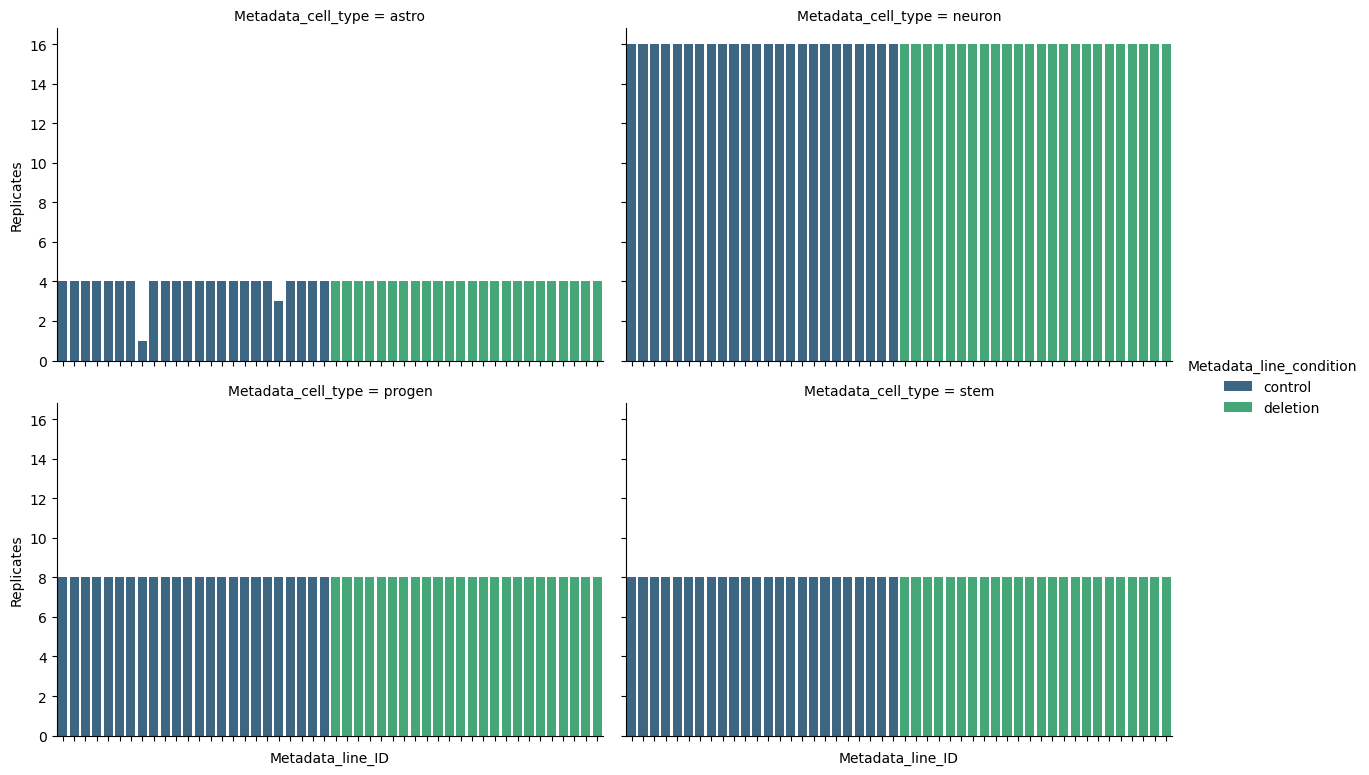

In [3]:
columns = [
    "Metadata_line_ID",
    "Metadata_cell_type",
    "Metadata_line_condition",
    "Metadata_line_source",
]

sorted_df = (
    all_df.groupby(columns)
    .size()
    .reset_index(name="Replicates")
    .sort_values(by=columns)
)

# Create a faceted bar plot
g = sns.catplot(
    data=sorted_df,
    x="Metadata_line_ID",
    y="Replicates",
    hue="Metadata_line_condition",
    col="Metadata_cell_type",
    col_wrap=2,
    kind="bar",
    height=4,
    aspect=1.5,
    palette="viridis",
)

g.set_xticklabels(rotation=90, ha="center")
plt.show()

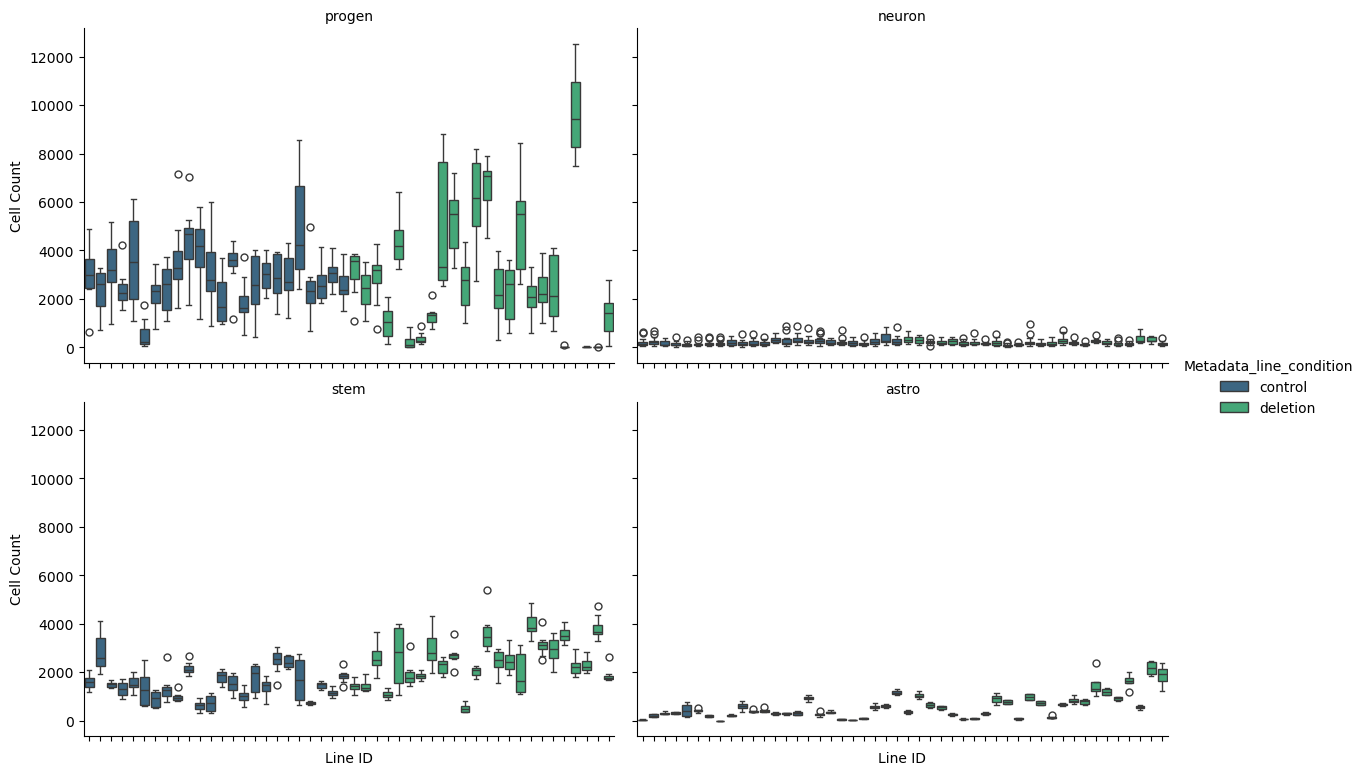

In [4]:
columns = [
    "Metadata_line_ID",
    "Metadata_cell_type",
    "Metadata_line_condition",
]

mean_cell_count = all_df.groupby(columns)["Metadata_Object_Count"].mean().reset_index()

g = sns.catplot(
    data=all_df,
    x="Metadata_line_ID",
    y="Metadata_Object_Count",
    hue="Metadata_line_condition",
    col="Metadata_cell_type",
    col_wrap=2,
    kind="box",
    height=4,
    aspect=1.5,
    palette="viridis",
)

# Improve the layout and aesthetics
g.set_xticklabels(rotation=90, ha="center")
g.set_titles("{col_name}")  # Optional: Set the titles for each facet
g.set_axis_labels("Line ID", "Cell Count")  # Optional: Set the axis labels

plt.show()

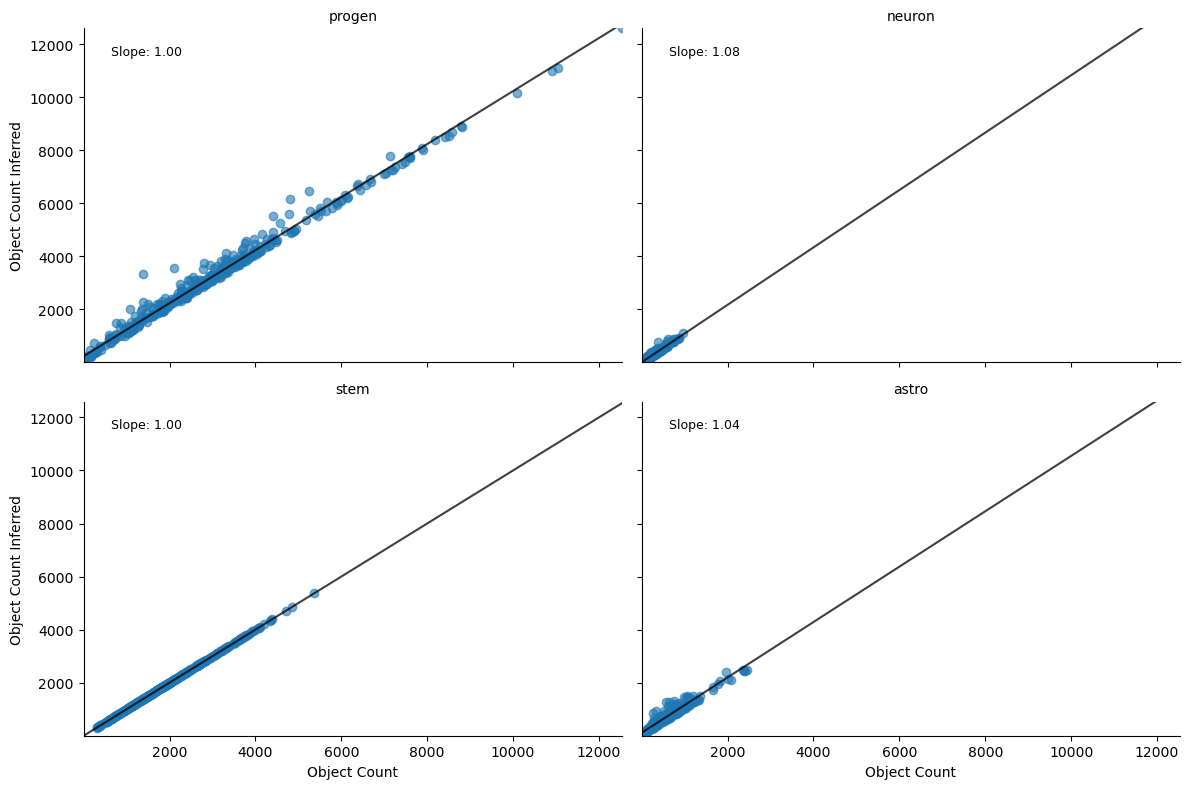

In [5]:
# Define a custom plotting function
def scatter_with_regression(x, y, **kwargs):
    # Plot the scatter plot
    plt.scatter(x, y, alpha=0.6, **kwargs)

    # Fit a linear regression (polynomial of degree 1)
    slope, intercept = np.polyfit(x, y, 1)

    # Draw regression line
    ax = plt.gca()  # Get the current Axes instance on the current figure
    lims = np.array(ax.get_xlim())  # Get x limits to plot the regression line
    ax.plot(lims, slope * lims + intercept, "k-", alpha=0.75, zorder=1)  # Draw the line

    # Annotate the plot with the slope of the regression line
    plt.annotate(
        f"Slope: {slope:.2f}",
        xy=(0.05, 0.95),
        xycoords="axes fraction",
        ha="left",
        va="top",
        fontsize=9,
    )


# Create the FacetGrid
g = sns.FacetGrid(all_df, col="Metadata_cell_type", col_wrap=2, height=4, aspect=1.5)

# Map the custom function to the grid
g.map(
    scatter_with_regression, "Metadata_Object_Count", "Metadata_Object_Count_inferred"
)

# Improve the layout and aesthetics
g.set_axis_labels("Object Count", "Object Count Inferred")
g.set_titles("{col_name}")

# Optional: Set the same x and y limits for all subplots based on overall data
x_lims = (all_df["Metadata_Object_Count"].min(), all_df["Metadata_Object_Count"].max())
y_lims = (
    all_df["Metadata_Object_Count_inferred"].min(),
    all_df["Metadata_Object_Count_inferred"].max(),
)
g.set(xlim=x_lims, ylim=y_lims)

# Show the plot
plt.tight_layout()  # Adjust the layout to fit better
plt.show()

In [6]:
# Get feature columns

feature_columns = [col for col in all_df.columns if not col.startswith("Metadata_")]

# Split each feature_columns by _ and then get the first substring, then count the frequency of each substring
# and sort by the frequency
feature_count = (
    pd.Series(feature_columns)  # Create a Series from the feature_columns list
    .str.split("_")  # Split the strings at '_'
    .str[0]  # Select the first substring
    .value_counts()  # Count the occurrences of each substring
    .reset_index()  # Convert to DataFrame
    .sort_values(by="count", ascending=False)  # Sort by counts
)

feature_count

,index,count
0,Nuclei,367
1,Cytoplasm,264
2,Cells,208


In [7]:
nans_per_column = all_df.isna().sum()

# Filter columns that have any NaNs
columns_with_nans = nans_per_column[nans_per_column > 0].sort_values(ascending=False)

columns_with_nans

Series([], dtype: int64)